# Task 1 — Exploratory Data Analysis (EDA) & Text Preprocessing

In this notebook we will:
1. Load the full CFPB complaint dataset  
2. Explore the dataset to understand structure and quality  
3. Perform initial cleaning and filtering  
4. Save the cleaned dataset for downstream tasks

**Business Objective:** Prepare complaint narratives for building a RAG pipeline.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Dataset Overview

Let’s inspect the number of rows, columns, and summary information.


In [20]:
# Change the path to where you saved the raw dataset
data_path = "../data/raw/complaints.csv"
df = pd.read_csv(data_path)

# Show the first rows
df.head()


C:\Users\azeb.mehrete\AppData\Local\Temp\ipykernel_7248\2149302249.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [21]:
print("Rows, Columns:", df.shape)
df.info()


Rows, Columns: (9609797, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), 

### Missing Value Summary

See which columns have missing values and how many.


In [22]:
df.isnull().sum().sort_values(ascending=False)


Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
Sub-issue                        839522
Sub-product                      235295
State                             54516
ZIP code                          30228
Company response to consumer         20
Issue                                 6
Date received                         0
Product                               0
Company                               0
Date sent to company                  0
Submitted via                         0
Timely response?                      0
Complaint ID                          0
dtype: int64

## Distribution of Complaints by Product
Let’s plot how many complaints each product category has.


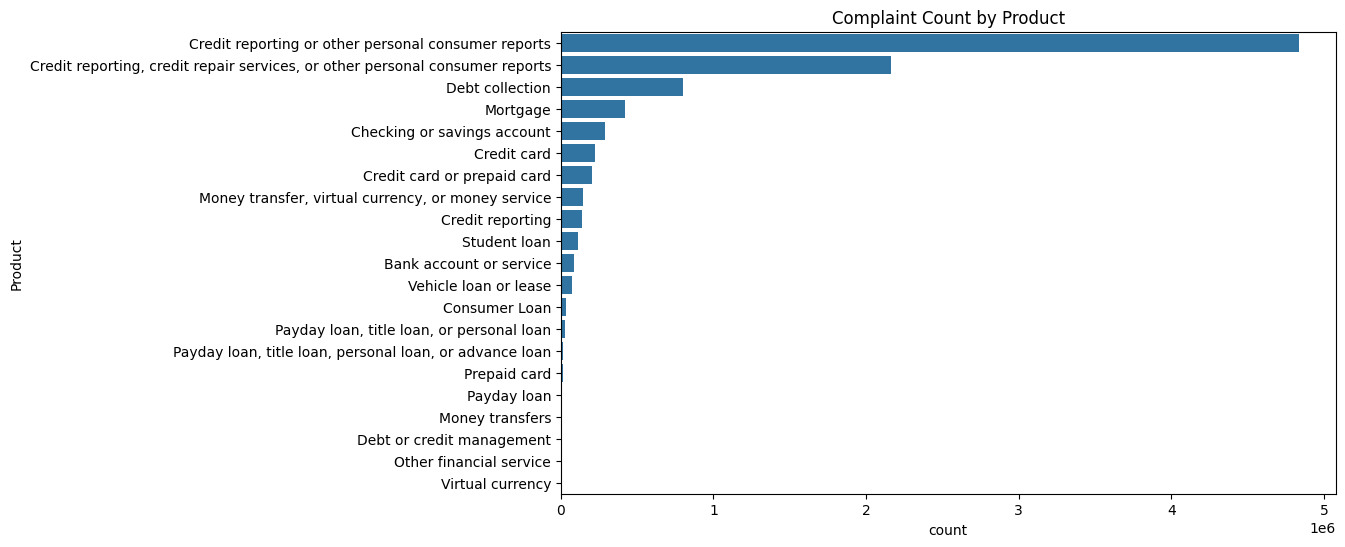

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y="Product", data=df, order=df["Product"].value_counts().index)
plt.title("Complaint Count by Product")
plt.show()


## Narrative Length Analysis

We’ll explore the length of consumer complaint narratives for quality and potential filtering.


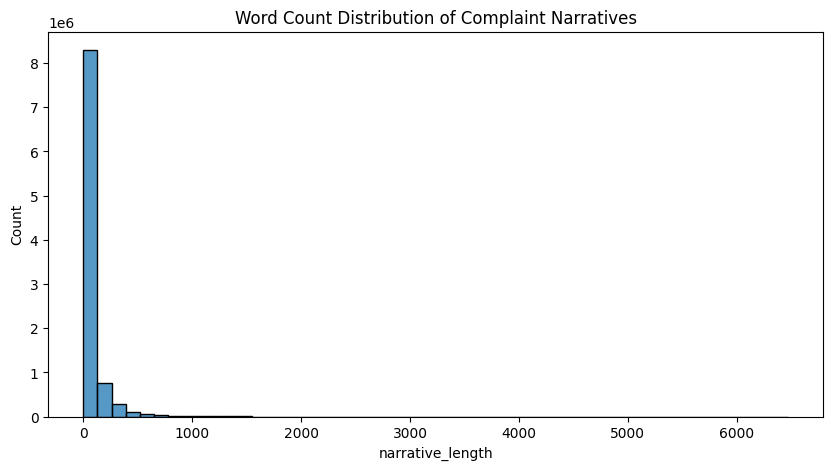

In [24]:
# Some complaints might not have a narrative column
if "Consumer complaint narrative" in df.columns:
    df["narrative_length"] = df["Consumer complaint narrative"].fillna("").apply(lambda x: len(x.split()))
    plt.figure(figsize=(10,5))
    sns.histplot(df["narrative_length"], bins=50)
    plt.title("Word Count Distribution of Complaint Narratives")
    plt.show()
else:
    print("No narrative column found.")


## Filter to Relevant Products

We keep only:
- Credit card
- Personal loan
- Savings account
- Money transfers

Also drop records without a narrative.


In [25]:
products = ["Credit card", "Payday loan, title loan, or personal loan","Payday loan, title loan, personal loan, or advance loan", "Checking or savings account", "Money transfers"]

df_filtered = df[
    df["Product"].isin(products) &
    df["Consumer complaint narrative"].notna()
].copy()

df_filtered.reset_index(drop=True, inplace=True)
print("Filtered Rows:", df_filtered.shape[0])


Filtered Rows: 248617


## Text Cleaning

We will:
- Lowercase all text
- Remove URLs
- Remove boilerplate and special characters


In [ ]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+", " ", text)  # remove URLs
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # keep alphanumeric
    text = re.sub(r"\s+", " ", text).strip()  # normalize whitespace
    return text

df_filtered["cleaned_narrative"] = df_filtered["consumer_complaint_narrative"].apply(clean_text)
df_filtered.head()


In [26]:
output_path = "../data/processed/filtered_complaints.csv"
df_filtered.to_csv(output_path, index=False)
print("Saved cleaned data to:", output_path)


Saved cleaned data to: ../data/processed/filtered_complaints.csv
